In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from processing import process

cardpath =  'test/AhQc10c.jpg'

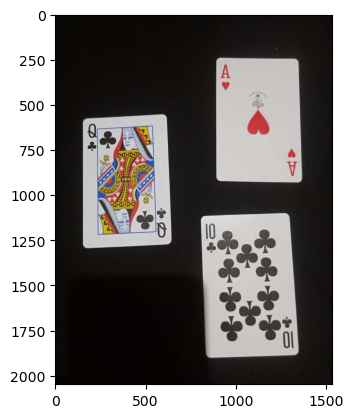

In [2]:
original_image = cv2.imread(cardpath)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image_rgb)
plt.show()

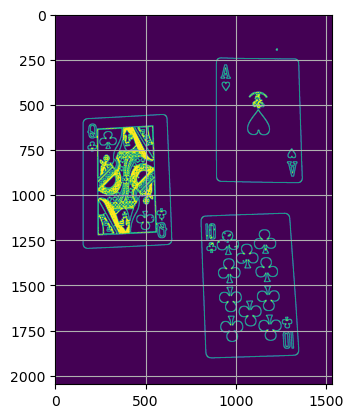

top_left: [809, 1129]
bottom_left: [844, 1899]
bottom_right: [1343, 1878]
top_right: [1284, 1105]

top_left: [157, 590]
bottom_left: [166, 1295]
bottom_right: [642, 1265]
top_right: [609, 558]

top_left: [901, 245]
bottom_left: [895, 916]
bottom_right: [1354, 932]
top_right: [1343, 257]



In [3]:
imgResult = original_image_rgb.copy()
imgResult2 = original_image_rgb.copy()

thresh = process.get_thresh(imgResult)

corners_list = process.find_corners_set(thresh, imgResult, draw=True)

four_corners_set = corners_list


plt.imshow(thresh)
plt.grid()
plt.show()

for i, corners in enumerate(corners_list):
    top_left = corners[0][0]
    bottom_left = corners[1][0]
    bottom_right = corners[2][0]
    top_right = corners[3][0]
    
    print(f'top_left: {top_left}')
    print(f'bottom_left: {bottom_left}')
    print(f'bottom_right: {bottom_right}')
    print(f'top_right: {top_right}\n')


In [4]:
# false: Qs, 9s, Ac


(300, 200, 3)


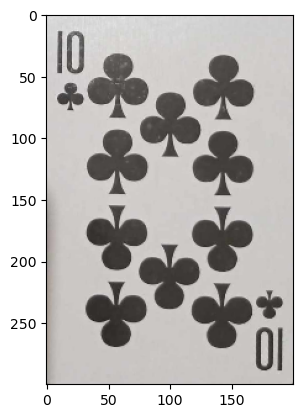

(300, 200, 3)


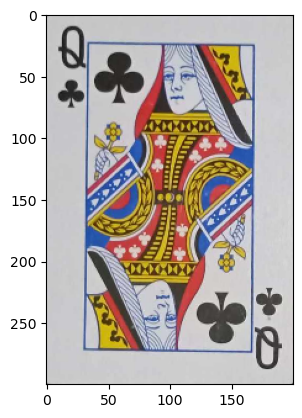

(300, 200, 3)


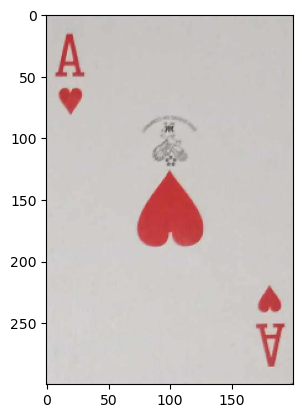

In [5]:
flatten_card_set = process.find_flatten_cards(imgResult2, four_corners_set)

for img_output in flatten_card_set:
    print(img_output.shape)

    plt.imshow(img_output)
    plt.show()

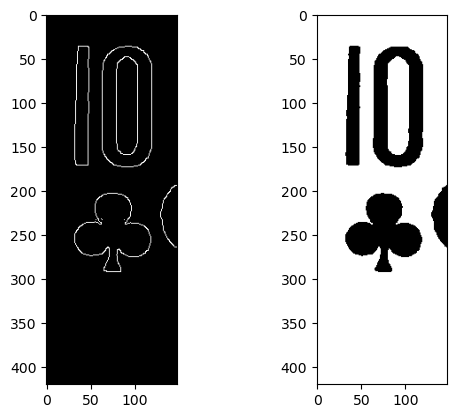

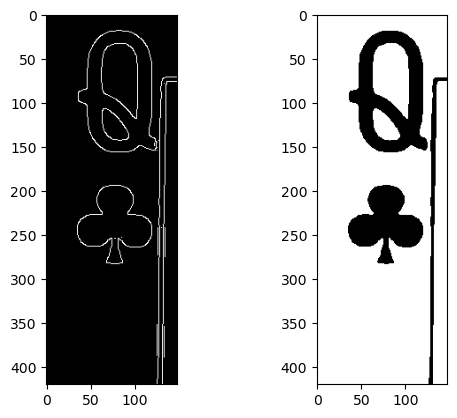

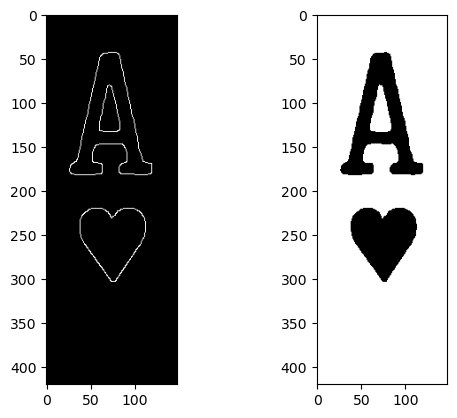

In [6]:
cropped_images = process.get_corner_snip(flatten_card_set)
for i, pair in enumerate(cropped_images):
    for j, img in enumerate(pair):
        # cv2.imwrite(f'num{i*2+j}.jpg', img)
        plt.subplot(1, len(pair), j+1)
        plt.imshow(img, 'gray')

    plt.show()

contour sorts = 7108.5
contour sorts = 4301.5
contour sorts = 9265.5
contour sorts = 4143.0
contour sorts = 6105.5
contour sorts = 4154.5


C:\Users\trido\AppData\Local\Temp\ipykernel_9348\3313997055.py:23: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, len(cropped_images), i+1)


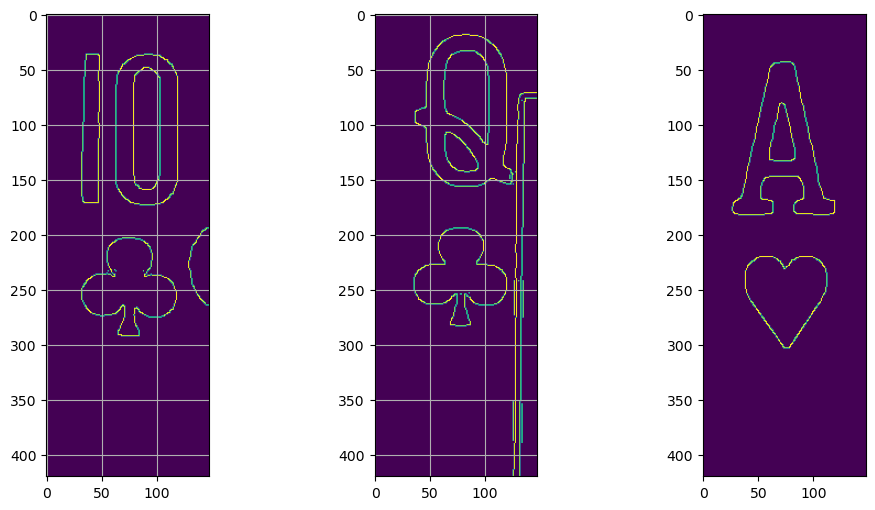

In [7]:

ranksuit_list: list = list()


plt.figure(figsize=(12, 6))
for i, (img, original) in enumerate(cropped_images):

    drawable = img.copy()
    d2 = original.copy()

    contours, _ = cv2.findContours(drawable, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    cnts_sort = sorted(contours, key=cv2.contourArea, reverse=True)[:2]

    cnts_sort = sorted(cnts_sort, key=lambda x: cv2.boundingRect(x)[1])
    
    for cnt in cnts_sort:
        print(f'contour sorts = {cv2.contourArea(cnt)}')

    cv2.drawContours(drawable, cnts_sort, -1, (0, 255, 0), 1)

    # cv2.imwrite(f'{i}.jpg', drawable)
    plt.grid(True)
    plt.subplot(1, len(cropped_images), i+1)
    plt.imshow(img)

    ranksuit = list()

    for i, cnt in enumerate(cnts_sort):
        x, y, w, h = cv2.boundingRect(cnt)
        x2, y2 = x+w, y+h

        crop = d2[y:y2, x:x2]
        if(i == 0): # rank: 70, 125
            crop = cv2.resize(crop, (70, 125), 0, 0)
        else: # suit: 70, 100
            crop = cv2.resize(crop, (70, 100), 0, 0)
        # convert to bin image
        _, crop = cv2.threshold(crop, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

        crop = cv2.bitwise_not(crop)

        # # reverse bin image
        # crop = 

        ranksuit.append(crop)

        # cv2.rectangle(d2, (x, y), (x2, y2), (0, 255, 0), 2)
        

    ranksuit_list.append(ranksuit)


    # cv2.imshow('', d2)
    # cv2.waitKey()
    # cv2.destroyAllWindows()
        
    
plt.show()

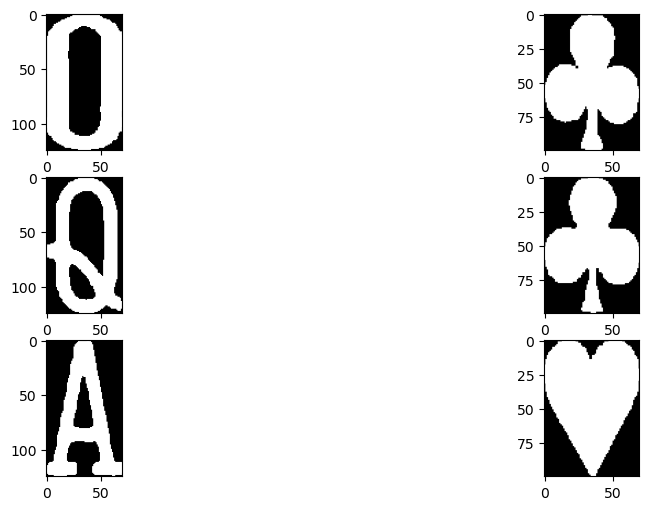

In [8]:
black_img = np.zeros((120, 70))
plt.figure(figsize=(12, 6))
for i, ranksuit in enumerate(ranksuit_list):

    rank = black_img
    suit = black_img
    try:
        rank = ranksuit[0]
        suit = ranksuit[1]
    except:
        pass

    plt.subplot(len(ranksuit_list), 2, i*2+1)

    # cv2.imwrite(f"{i}.jpg", rank_name)
    plt.imshow(rank, 'gray')
    plt.subplot(len(ranksuit_list), 2, i*2+2)
    plt.imshow(suit, 'gray')

plt.show()

(125, 70)
(100, 70)


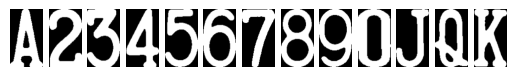

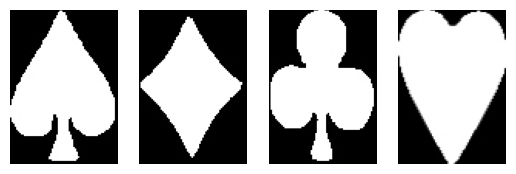

In [9]:
from utils.Loader import Loader

train_ranks = Loader.load_ranks('imgs2/ranks')
train_suits = Loader.load_suits('imgs2/suits')

print(train_ranks[0].img.shape)
print(train_suits[0].img.shape)

for i, rank in enumerate(train_ranks):
    plt.subplot(1, len(train_ranks), i +1)
    plt.axis('off')
    plt.imshow(rank.img, 'gray')

plt.show()

for i, suit in enumerate(train_suits):
    plt.subplot(1, len(train_suits), i +1)
    plt.axis('off')
    plt.imshow(suit.img, 'gray')

plt.show()


diff score: 6005


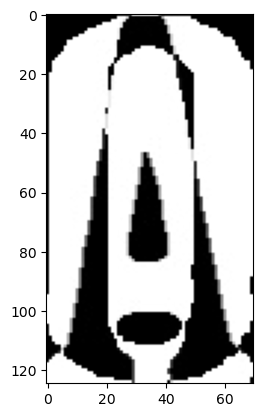

diff score: 3205


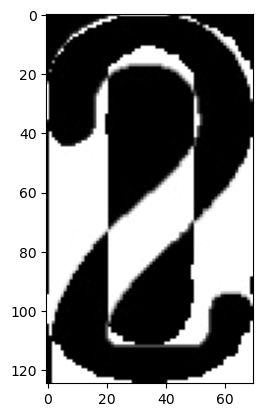

diff score: 2839


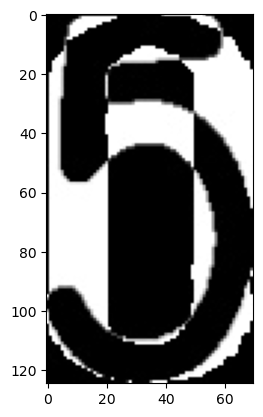

diff score: 2196


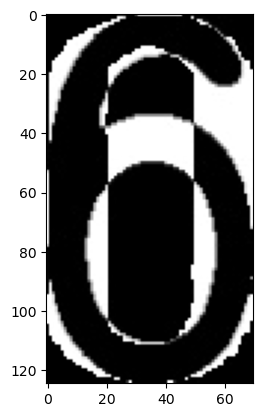

diff score: 612


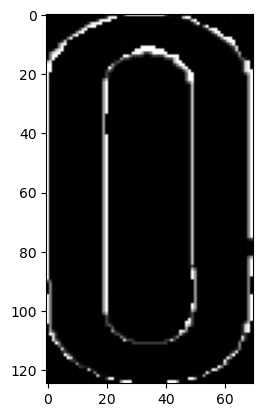

diff score: 841


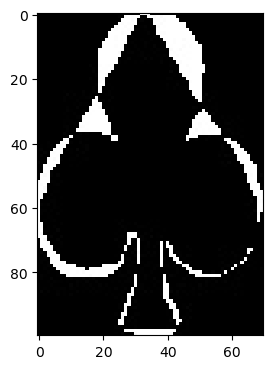

diff score: 407


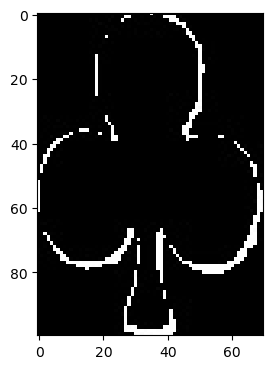

('10', 'Clubs')
diff score: 4471


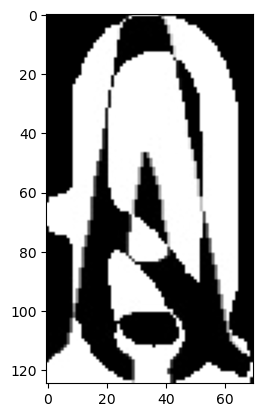

diff score: 3468


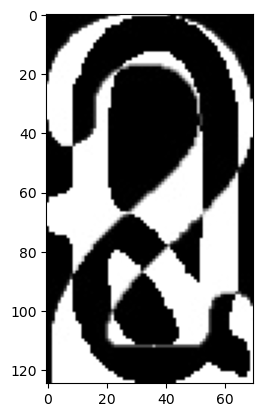

diff score: 3362


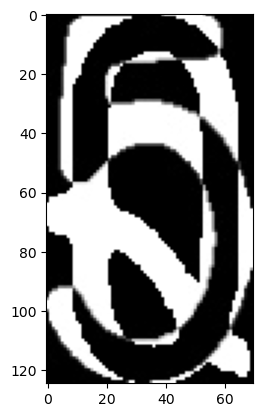

diff score: 2964


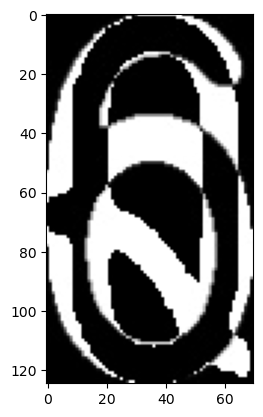

diff score: 2877


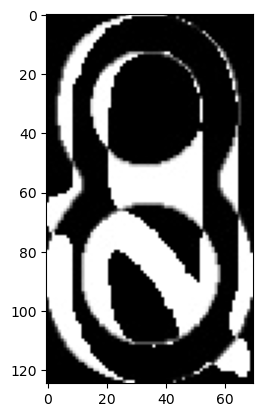

diff score: 2716


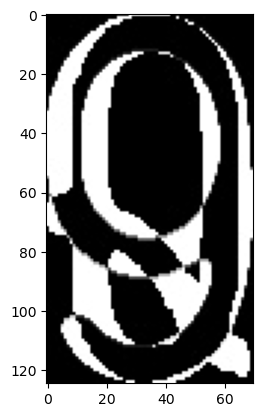

diff score: 2542


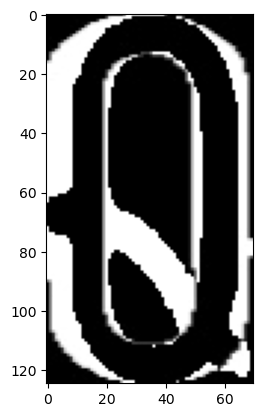

diff score: 2079


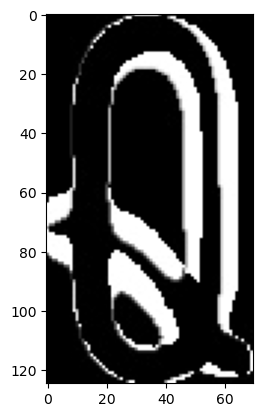

diff score: 982


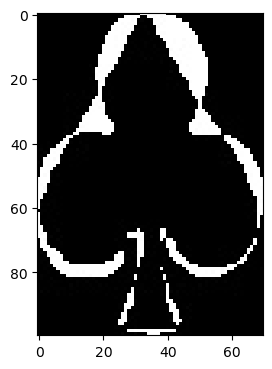

diff score: 382


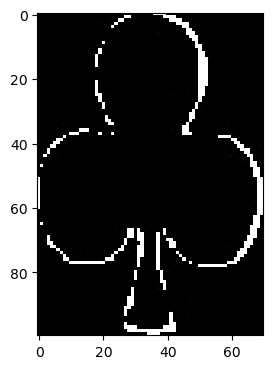

('Q', 'Clubs')
diff score: 850


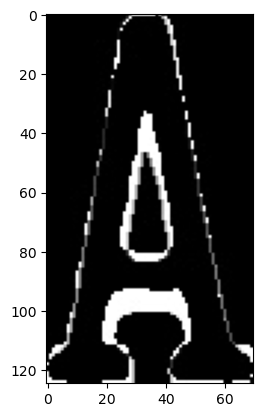

diff score: 2684


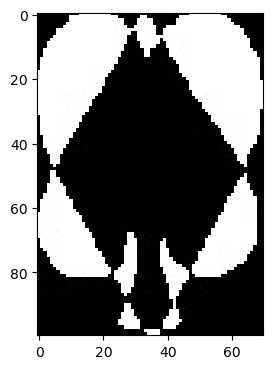

diff score: 2075


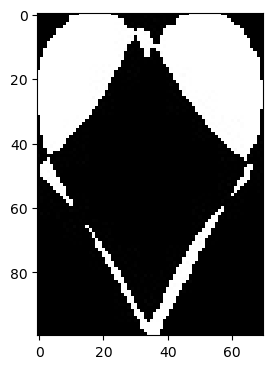

diff score: 267


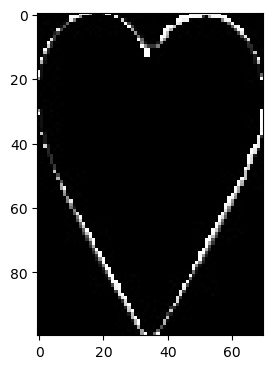

('A', 'Hearts')


In [10]:
for it in ranksuit_list:
    try:
        rank = it[0]
        suit = it[1]
    except:
        continue
    rs = process.template_matching(rank, suit, train_ranks, train_suits, show_plt=True)
    print(rs)